In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#read the file
df = pd.read_csv('Stripper boot Train (1).csv')

In [ ]:
df.head()

,Time,Level
0,0,50.428905
1,1,52.541920
2,2,54.991997
3,3,58.265240
4,4,51.735180


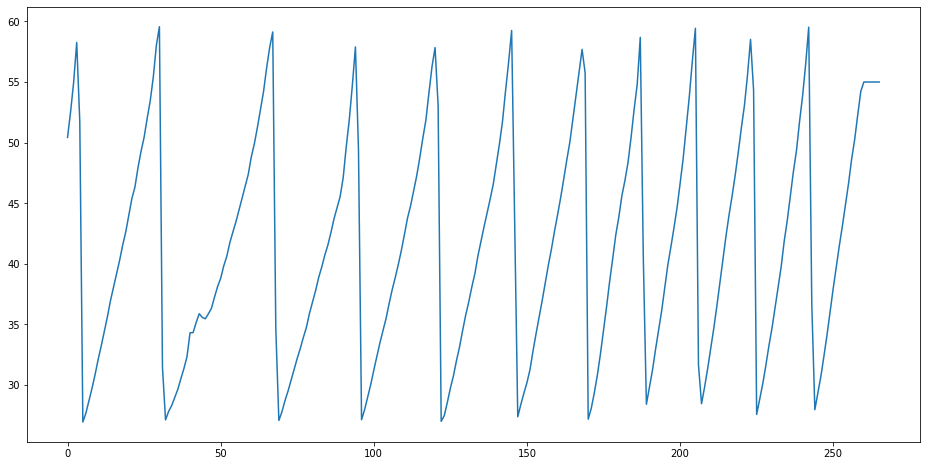

In [ ]:
df.index = df['Time']
plt.figure(figsize=(16,8))
plt.plot(df['Level'], label='Stripper boot level')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Time', 'Level'])
for i in range(0,len(data)):
    new_data['Time'][i] = data['Time'][i]
    new_data['Level'][i] = data['Level'][i]

In [ ]:
#setting index
new_data.index = new_data.Time
new_data.drop('Time', axis=1, inplace=True)

In [ ]:
#creating train and test sets
dataset = new_data.values

In [ ]:
train = dataset[0:241,:]
valid = dataset[240:,:]

In [ ]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
6/6 - 4s - loss: 0.0092
Epoch 2/150
6/6 - 0s - loss: 0.0061
Epoch 3/150
6/6 - 0s - loss: 0.0053
Epoch 4/150
6/6 - 0s - loss: 0.0043
Epoch 5/150
6/6 - 0s - loss: 0.0036
Epoch 6/150
6/6 - 0s - loss: 0.0038
Epoch 7/150
6/6 - 0s - loss: 0.0072
Epoch 8/150
6/6 - 0s - loss: 0.0108
Epoch 9/150
6/6 - 0s - loss: 0.0048
Epoch 10/150
6/6 - 0s - loss: 0.0045
Epoch 11/150
6/6 - 0s - loss: 0.0055
Epoch 12/150
6/6 - 0s - loss: 0.0057
Epoch 13/150
6/6 - 0s - loss: 0.0052
Epoch 14/150
6/6 - 0s - loss: 0.0042
Epoch 15/150
6/6 - 0s - loss: 0.0045
Epoch 16/150
6/6 - 0s - loss: 0.0059
Epoch 17/150
6/6 - 0s - loss: 0.0091
Epoch 18/150
6/6 - 0s - loss: 0.0045
Epoch 19/150
6/6 - 0s - loss: 0.0052
Epoch 20/150
6/6 - 0s - loss: 0.0037
Epoch 21/150
6/6 - 0s - loss: 0.0044
Epoch 22/150
6/6 - 0s - loss: 0.0076
Epoch 23/150
6/6 - 0s - loss: 0.0040
Epoch 24/150
6/6 - 0s - loss: 0.0037
Epoch 25/150
6/6 - 0s - loss: 0.0034
Epoch 26/150
6/6 - 0s - loss: 0.0033
Epoch 27/150
6/6 - 0s - loss: 0.0036
Epoch 28/1

In [ ]:
#predicting values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Boot_Level = model.predict(X_test)
Boot_Level = scaler.inverse_transform(Boot_Level)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-Boot_Level),2)))
rms

Level          10.177182
Predictions     0.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


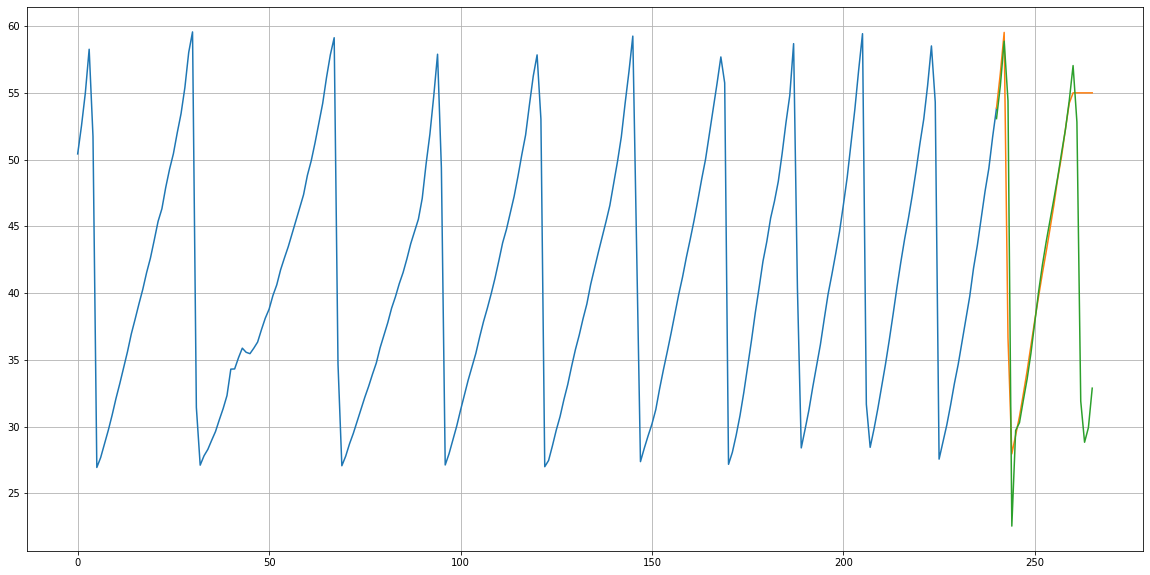

In [ ]:
#for plotting
train = new_data[:241]
valid = new_data[240:]
valid['Predictions'] = Boot_Level
plt.plot(train['Level'])
plt.plot(valid[['Level','Predictions']])
plt.grid()

In [ ]:
if predicted_stock_price[-1] - real_stock_price[-1] > 3:
  print('Dumpline valve problem') 
elif predicted_stock_price[-1] - real_stock_price[-1] < -3:
  print('sequence valve problem')
else:
  print('system normal') 